# TMDB EDA

- Darlene Adams

##  Import Packages

In [11]:
# Import packages
import os, time, json
import tmdbsimple as tmdb 
import pandas as pd
from tqdm.notebook import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
# Create the folder for saving files (if it doesn't exist)
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'create_movies_database.sql',
 'final_tmdb_data_2010.csv.gz',
 'movies_erd.mwb',
 'Movies_ERD.png',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'titles_ratings.csv',
 'title_basics.csv',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2010.json',
 'tmdb_results_years_2001.csv.gz',
 'tmdb_results_years_2002.csv.gz',
 'tmdb_years.csv']

In [17]:
df = pd.read_csv('Data/tmdb_years.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2653 non-null   object 
 1   adult                  2651 non-null   float64
 2   backdrop_path          1522 non-null   object 
 3   belongs_to_collection  217 non-null    object 
 4   budget                 2651 non-null   float64
 5   genres                 2651 non-null   object 
 6   homepage               213 non-null    object 
 7   id                     2651 non-null   float64
 8   original_language      2651 non-null   object 
 9   original_title         2651 non-null   object 
 10  overview               2592 non-null   object 
 11  popularity             2651 non-null   float64
 12  poster_path            2410 non-null   object 
 13  production_companies   2651 non-null   object 
 14  production_countries   2651 non-null   object 
 15  rele

In [18]:
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,2651.000000,2.651000e+03,2.651000e+03,2651.000000,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000
mean,0.001886,5.254924e+06,1.791965e+05,6.049896,1.215634e+07,93.958506,0.002263,4.614488,307.498680
std,0.043396,1.704591e+07,2.370477e+05,11.062873,6.004467e+07,27.885084,0.047529,2.476859,1466.392564
min,0.000000,0.000000e+00,6.400000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,2.512950e+04,1.176500,0.000000e+00,88.000000,0.000000,3.500000,1.000000
50%,0.000000,0.000000e+00,7.044300e+04,2.301000,0.000000e+00,94.000000,0.000000,5.400000,8.000000
75%,0.000000,0.000000e+00,2.696945e+05,6.277000,0.000000e+00,105.000000,0.000000,6.346500,49.000000
max,1.000000,1.400000e+08,1.197023e+06,169.101000,9.764756e+08,301.000000,1.000000,10.000000,25538.000000


## Create Visualizations to Answer the Following Questions:

- 
How many movies had at least some valid financial information (values > 0 for budget OR revenue)
- ?    - 
Please exclude any movies with 0's for budget AND revenue from the remaining visualization
    - s- .
How many movies are there in each of the certification categories (G/PG/PG-13/R- )?
What is the average revenue per certification catego- ry?
What is the average budget per certification category?

In [19]:
df['budget'].value_counts

<bound method IndexOpsMixin.value_counts of 0              NaN
1       48000000.0
2              0.0
3              0.0
4       22000000.0
           ...    
2648           0.0
2649           0.0
2650           0.0
2651           0.0
2652           0.0
Name: budget, Length: 2653, dtype: float64>

In [20]:
df['revenue'].value_counts

<bound method IndexOpsMixin.value_counts of 0              NaN
1       76019048.0
2              0.0
3              0.0
4        5271666.0
           ...    
2648           0.0
2649           0.0
2650           0.0
2651           0.0
2652           0.0
Name: revenue, Length: 2653, dtype: float64>

In [22]:
fdf = df.query('budget <= 0 & revenue <= 0 ')

In [23]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 2652
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1925 non-null   object 
 1   adult                  1925 non-null   float64
 2   backdrop_path          913 non-null    object 
 3   belongs_to_collection  95 non-null     object 
 4   budget                 1925 non-null   float64
 5   genres                 1925 non-null   object 
 6   homepage               99 non-null     object 
 7   id                     1925 non-null   float64
 8   original_language      1925 non-null   object 
 9   original_title         1925 non-null   object 
 10  overview               1869 non-null   object 
 11  popularity             1925 non-null   float64
 12  poster_path            1710 non-null   object 
 13  production_companies   1925 non-null   object 
 14  production_countries   1925 non-null   object 
 15  rele

In [24]:
df.drop(fdf.index, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 2620
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                728 non-null    object 
 1   adult                  726 non-null    float64
 2   backdrop_path          609 non-null    object 
 3   belongs_to_collection  122 non-null    object 
 4   budget                 726 non-null    float64
 5   genres                 726 non-null    object 
 6   homepage               114 non-null    object 
 7   id                     726 non-null    float64
 8   original_language      726 non-null    object 
 9   original_title         726 non-null    object 
 10  overview               723 non-null    object 
 11  popularity             726 non-null    float64
 12  poster_path            700 non-null    object 
 13  production_companies   726 non-null    object 
 14  production_countries   726 non-null    object 
 15  relea

In [26]:
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,726.0,7.260000e+02,7.260000e+02,726.000000,7.260000e+02,726.000000,726.000000,726.000000,726.000000
mean,0.0,1.918843e+07,6.603944e+04,14.655814,4.438905e+07,102.396694,0.001377,5.651175,1065.037190
std,0.0,2.818381e+07,1.618316e+05,17.866964,1.083765e+08,22.765302,0.037113,1.806623,2656.390952
min,0.0,0.000000e+00,6.400000e+01,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.500000e+05,9.276250e+03,3.708500,0.000000e+00,91.000000,0.000000,5.300000,23.000000
50%,0.0,5.225000e+06,1.430500e+04,11.185000,3.137902e+06,99.000000,0.000000,6.055000,181.000000
75%,0.0,2.675000e+07,4.583975e+04,18.149750,3.534398e+07,111.000000,0.000000,6.700000,869.250000
max,0.0,1.400000e+08,1.182321e+06,169.101000,9.764756e+08,224.000000,1.000000,10.000000,25538.000000


### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

There are 726 movies that had some financial data in either budget or revenue

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

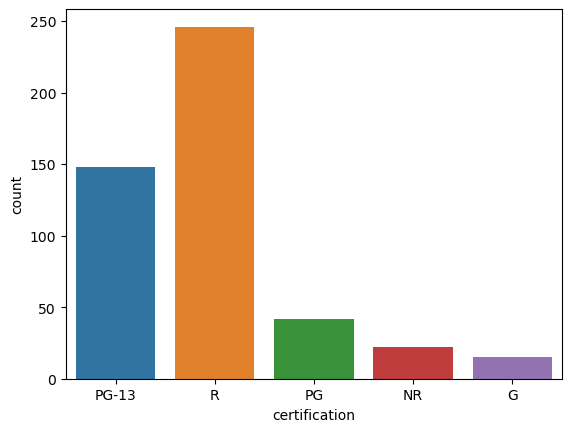

In [37]:
# Using seaborn to plot the group means
ax = sns.countplot(data=df, x='certification')

In [41]:
df['certification'].value_counts()

R        246
PG-13    148
PG        42
NR        22
G         15
Name: certification, dtype: int64

The number of movies in the each certification category are as follows:

R - 246

PG-13 - 148

PG - 42

NR - 22

G - 15


### What is the average revenue per certification category?

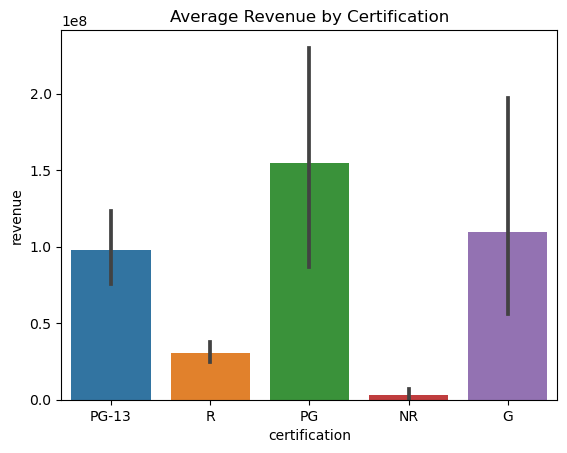

In [43]:
ax = sns.barplot(data=df, x='certification', y="revenue")
ax.set_title('Average Revenue by Certification');

In [47]:
# Group by certification categories and calculate the average revenue
avg_revenue_by_certification = df.groupby('certification')['revenue'].mean()

print(avg_revenue_by_certification)

certification
G        1.096521e+08
NR       3.126369e+06
PG       1.547250e+08
PG-13    9.805636e+07
R        3.061073e+07
Name: revenue, dtype: float64


The average revenue per certification category is as follows:

R - ~30 million

PG-13 - ~98 million

PG - ~154 million

NR - ~3 million

G - ~109 million

### What is the average budget per certification category?

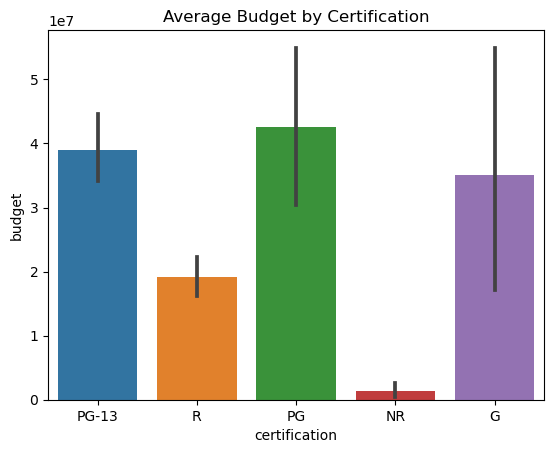

In [45]:
ax = sns.barplot(data=df, x='certification', y="budget")
ax.set_title('Average Budget by Certification');

In [46]:
# Group by certification categories and calculate the average budget
avg_budget_by_certification = df.groupby('certification')['budget'].mean()

print(avg_budget_by_certification)

certification
G        3.506667e+07
NR       1.417364e+06
PG       4.263624e+07
PG-13    3.904182e+07
R        1.908829e+07
Name: budget, dtype: float64


The average budget per certification category is as follows:

R - ~19 million

PG-13 - ~39 million

PG - ~42 million

NR - ~1.4 million

G - ~35 million